In [20]:
import pandas as pd 
import seaborn as sns
#from ydata_profiling import ProfileReport
#import sweetviz as sv
#import dtale
import numpy as np
import statistics
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt

from scipy import stats # библиотека для расчетов
import sweetviz  as sv
from sklearn.preprocessing import LabelEncoder
hotels = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_pandas/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [ ]:
# Не смог реализовать
{import pandas as pd
from geopy.geocoders import Nominatim

# Создаем объект локатора
locator = Nominatim(user_agent="my_app")

# Объявляем функцию, принимающую широту и долготу
def reverse_geocode(lat, lng):
    try:
        location = locator.reverse(f"{lat}, {lng}")
        return location.address if location else None
    except Exception as e:
        print(f"Ошибка при обработке координат ({lat}, {lng}): {e}")
        return None

# Допустим, у вас есть DataFrame 'hotels', содержащий поля 'latitude' и 'longitude'
hotels['location'] = hotels.apply(lambda row: reverse_geocode(row['lat'], row['lng']), axis=1)}


SyntaxError: invalid syntax (2911717111.py, line 1)

<Axes: >

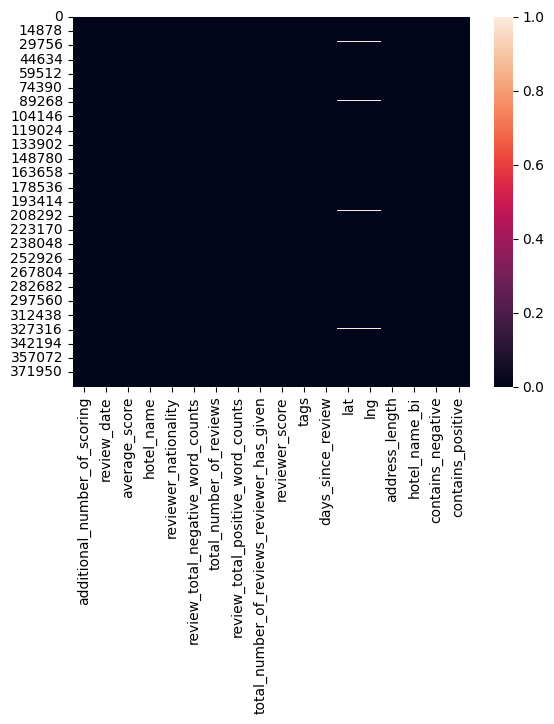

In [ ]:
hotels['address_length'] = hotels['hotel_address'].apply(len)
hotels = hotels.drop(columns=['hotel_address'])
# Создание экземпляра класса LabelEncoder
label_encoder = LabelEncoder()
# Применение label encoder к колонке 'Отель'
hotels['hotel_name_bi'] = label_encoder.fit_transform(hotels['hotel_name'])

one_hot_encoded = pd.get_dummies(hotels['reviewer_nationality'], prefix='reviewer_nationality')
result = pd.concat([hotels, one_hot_encoded], axis=1).drop('reviewer_nationality', axis=1)




sns.heatmap(hotels.isnull())

In [12]:
# Получаем уникальные государства
unique_countries = hotels['reviewer_nationality'].unique()

# Создаем словарь соответствий страна->индекс
country_to_index = {country: idx for idx, country in enumerate(unique_countries)}

# Добавляем новый столбец 'index_country' с присвоенными индексами
hotels['index_country'] = hotels['reviewer_nationality'].map(country_to_index)

# Результат отображается следующим образом:
print(hotels[['reviewer_nationality', 'index_country']])

          reviewer_nationality  index_country
0              United Kingdom               0
1              United Kingdom               0
2                       China               1
3              United Kingdom               0
4                      Poland               2
...                        ...            ...
386798                 France               3
386799                 Turkey              42
386800            Netherlands              14
386801   United Arab Emirates               7
386802              Australia              35

[386496 rows x 2 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_7264\4246523126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['index_country'] = hotels['reviewer_nationality'].map(country_to_index)


Количество дубликатов: 307
Размер таблицы после удаления дубликатов: (386496, 17)


<Axes: >

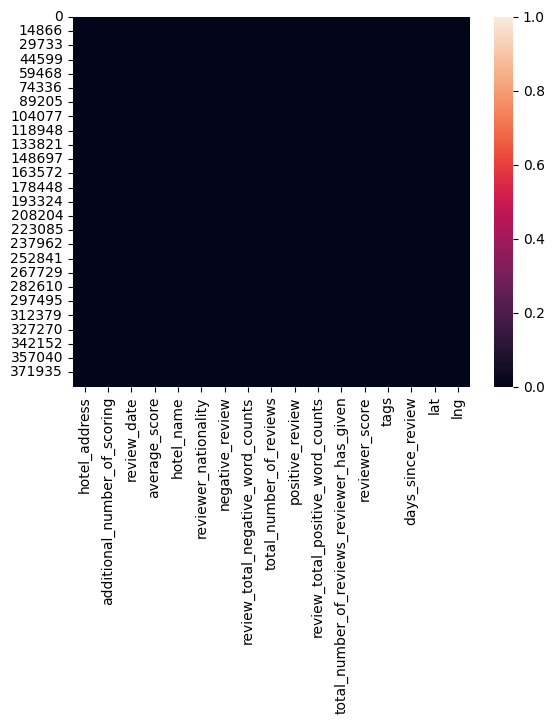

In [9]:
print('Количество дубликатов: {}'.format(hotels[hotels.duplicated()].shape[0]))

# Удаляем дубликаты:
hotels = hotels.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(hotels.shape))
sns.heatmap(hotels.isnull())

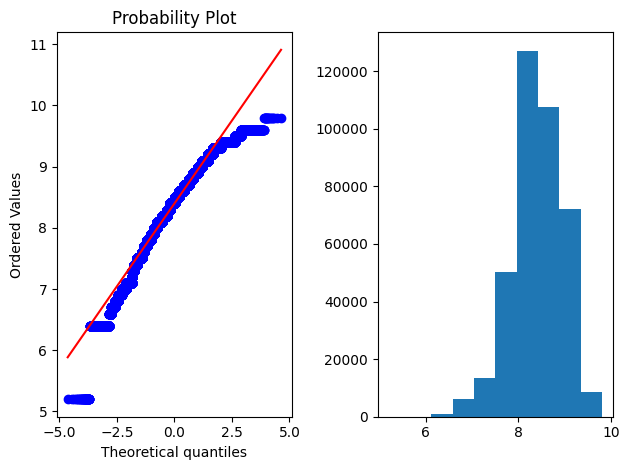

In [10]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(hotels['average_score'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(hotels['average_score']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

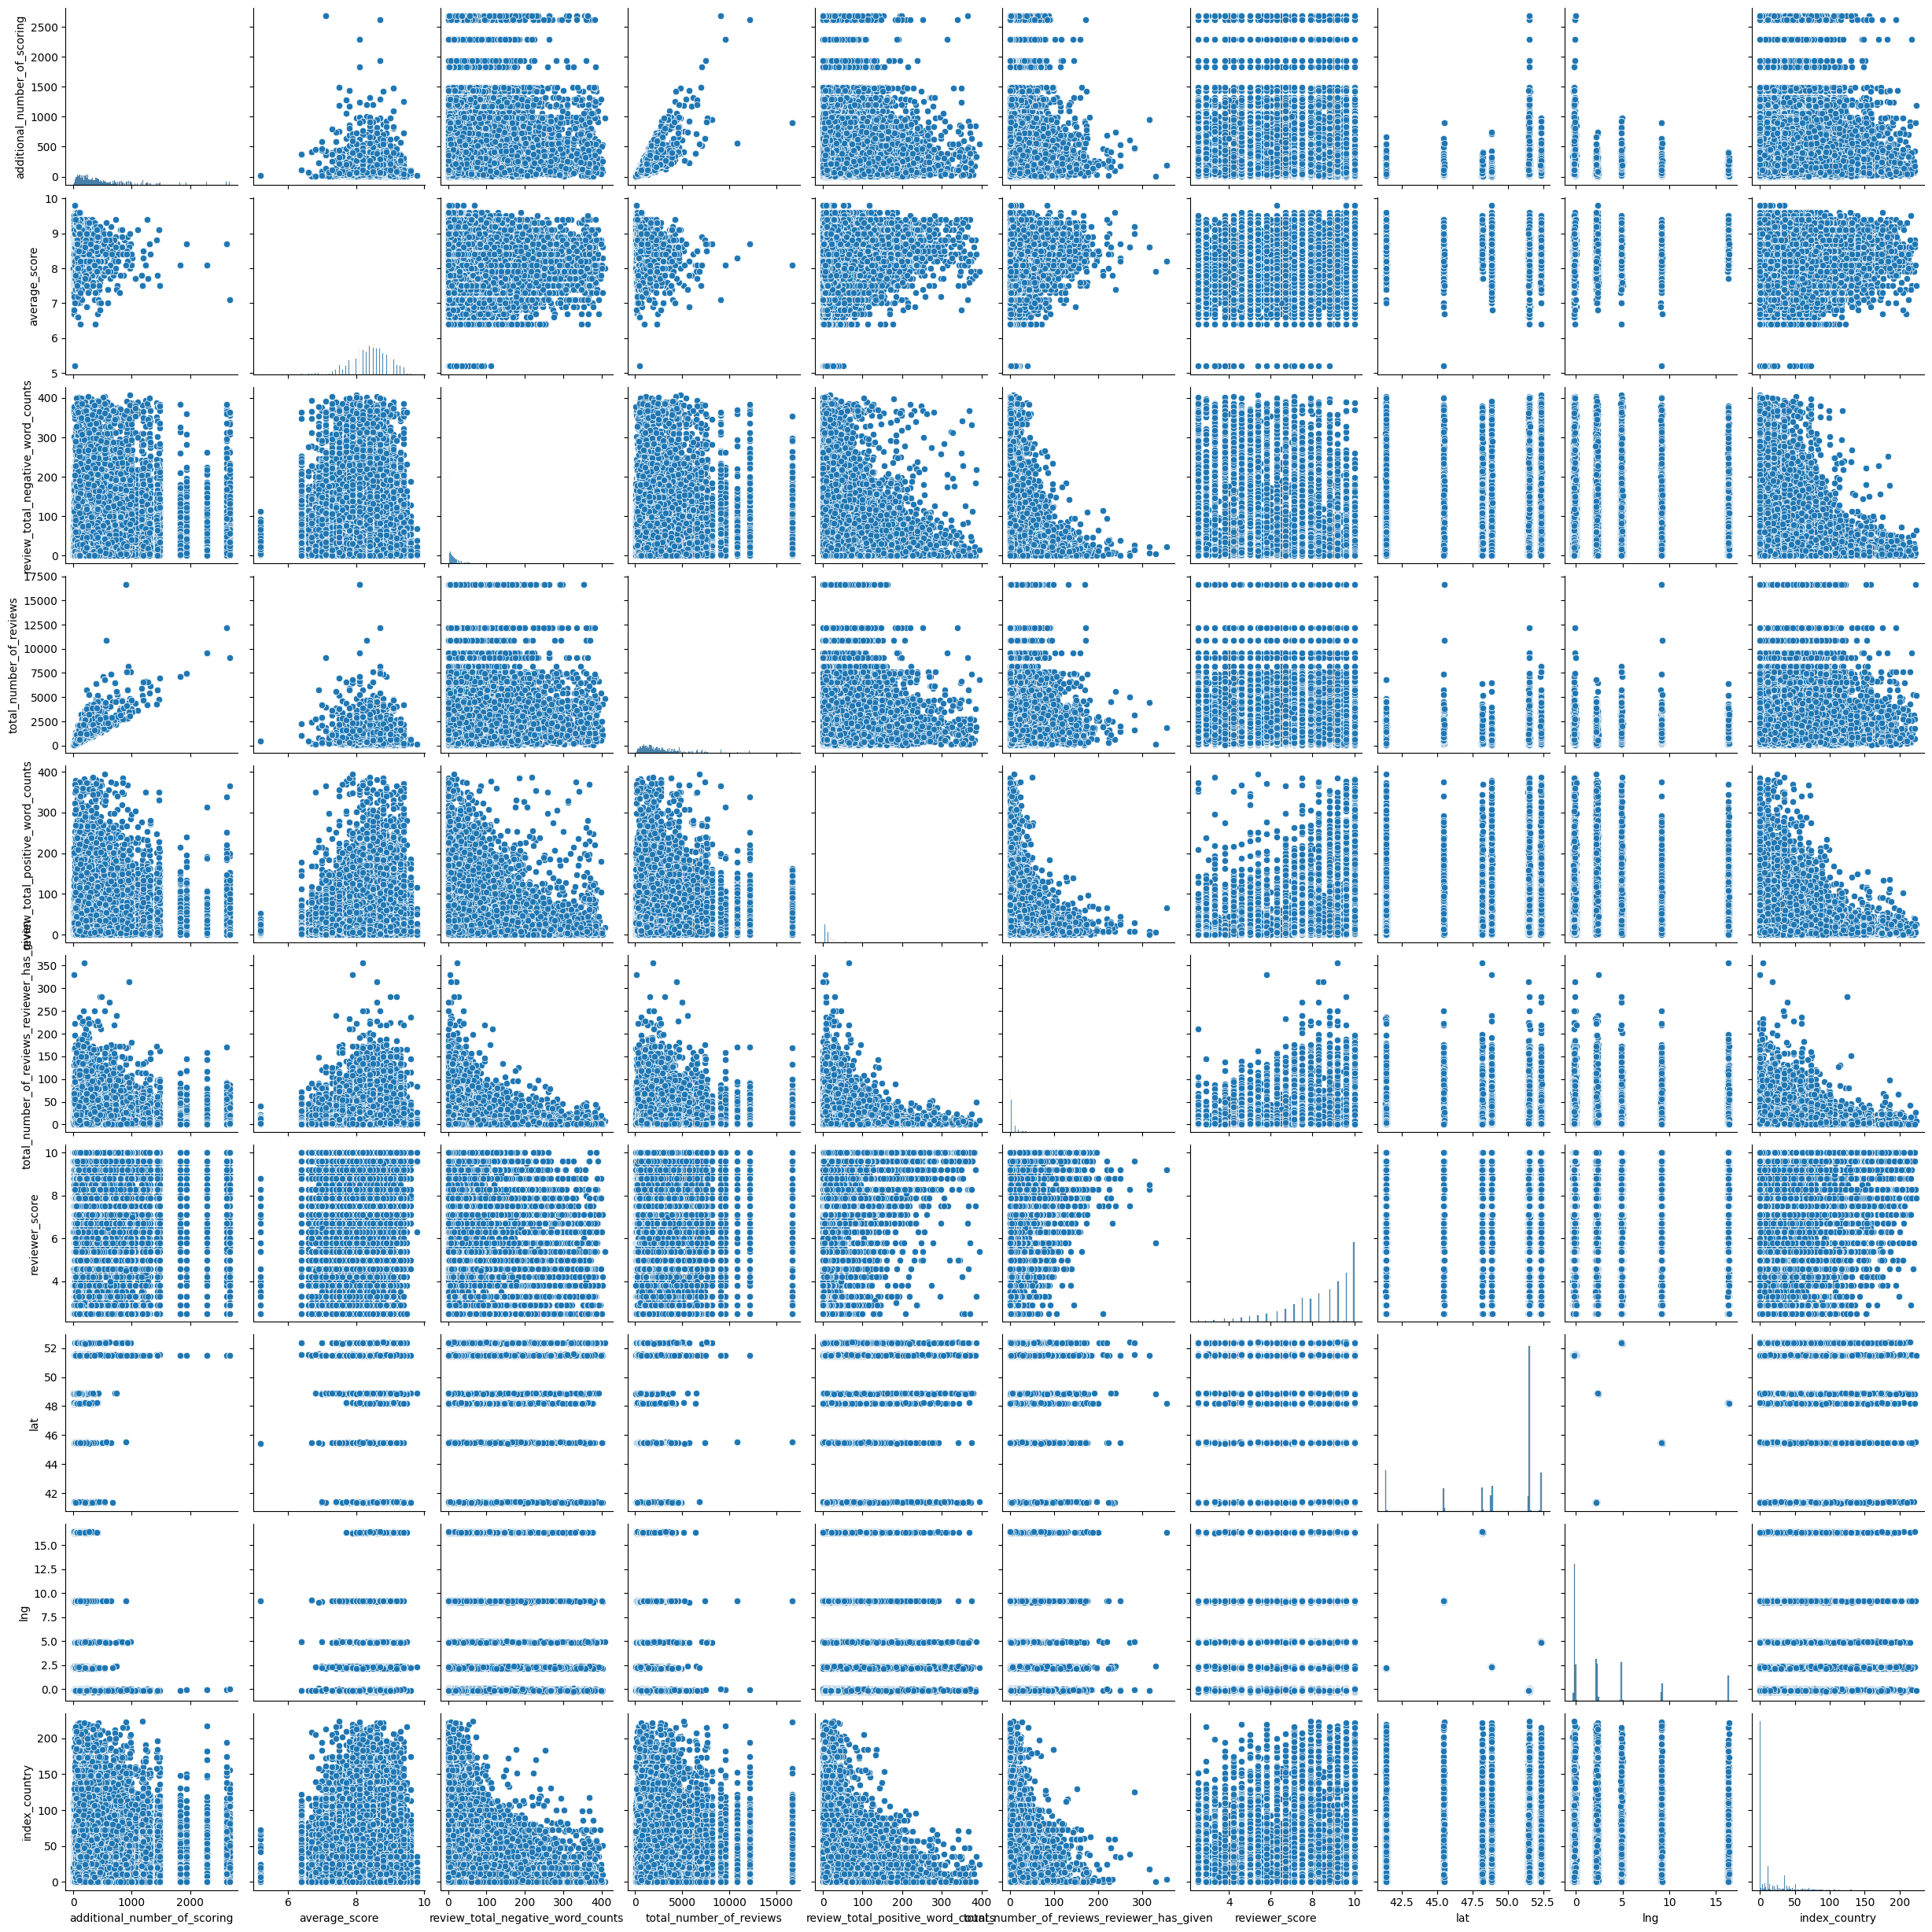

In [13]:
sns.pairplot(hotels)  # target_column — ваше целевое свойство
plt.show()

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
 9   address_length                              386803 non-null  int64  
 

C:\Users\Admin\AppData\Local\Temp\ipykernel_7264\1130357024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels.drop(object_columns, axis = 1, inplace=True)


MAPE: 0.14064426834280377
